<h1 style="text-align:center;">Incertitudes </h1>

#### Simuler un processus aléatoire illustrant la détermination de la valeur d’une grandeur avec incertitudes types composées (terminale)

Pour chacune des grandeurs physiques mesurées, la moyenne et l'écart-type (ou incertitude) sont supposés connus. Il s'agit ici de faire un tirage aléatoire pour chacune des grandeurs physiques puis de calculer la grandeur composée. Sur un grand nombre de tirages, on peut alors calculer pour la grandeur composée la moyenne et caractériser sa variabilité par la grandeur $\sigma_{n-1}$ qui représente l'incertitude sur celle-ci. Une comparaison avec la loi utilisée pour composer les incertitudes est proposée.

In [1]:
import random as rd
import matplotlib.pyplot as plt

In [2]:
def moy(liste):
    return sum(liste)/len(liste)

def ecart_type(liste):
    somme = 0
    for element in liste:
        somme += element**2
    return (1/(len(liste)-1) * somme - (sum(liste)/len(liste))**2)**0.5

def alea(moyenne, sigma):
    return rd.normalvariate(moyenne,sigma)

Cas d'un circuit RC série avec $R = 1000\ \Omega$ et une tolérance de 5% sur R et $C = 1\ \mu F$ et une tolérance de 5% sur C. On cherche à déterminer moyenne et écart-type sur les valeurs du temps caractéristique $\tau = R \times C$. Pour cela on tire un grand nombre de fois une valeur de R, et une valeur de C en assimilant par souci de simplification l'incertitude type à la tolérance. On calcule ensuite $\tau$ comme étant le produit des deux valeurs tirées. Les résultats sont stockés dans des listes afin de pouvoir calculer moyenne et écart-type sur la liste de valeurs de $\tau$.


Un grand nombre de paramètres influencent les valeurs de R et C, la loi statistique de répartition choisie est donc une loi normale centrée sur la valeur donnée par le constructeur.

In [3]:
# Données
R = 1000
sigmaR = 50
C = 1e-6
sigmaC = 5e-8

# Tirages et calculs
listeR = []
listeC = []
listeTau = []
for i in range(100000): # 100000 tirages aléatoires
    listeR.append(alea(R,sigmaR))
    listeC.append(alea(C,sigmaC))
    listeTau.append(listeR[-1]*listeC[-1])

Si on affiche les valeurs de $\tau$ sous la forme d'un histogramme, on retrouve bien l'allure d'une loi normale.

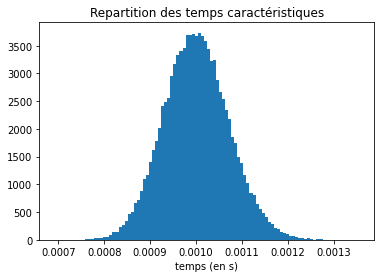

In [4]:
plt.hist(listeTau,bins=100)
plt.title("Repartition des temps caractéristiques")
plt.xlabel("temps (en s)")
plt.show()

On peut aussi comparer les valeurs moyennes de R et C aux valeurs données ainsi que les écart-types sur les deux séries aux tolérances données afin de vérifier la bonne réalisation du tirage aléatoire.

In [8]:
# Affichage des résultats
print("R donné:",R,"Ohms")
print("Rmoy de la série aléatoire:",moy(listeR),"Ohms")
print("---------------------------------------")
print("tolérance sur R:",sigmaR,"Ohms")
print("Ecart type de la série aléatoire de R:",ecart_type(listeR),"Ohms")
print("---------------------------------------")
print("C donné",C,"F")
print("Cmoy de la série aléatoire:",moy(listeC),"F")
print("---------------------------------------")
print("tolérance sur C:",sigmaC,"F")
print("Ecart type de la série aléatoire de C:",ecart_type(listeC),"F")

R donné: 1000 Ohms
Rmoy de la série aléatoire: 1000.1812846054386 Ohms
---------------------------------------
tolérance sur R: 50 Ohms
Ecart type de la série aléatoire de R: 50.078463539443405 Ohms
---------------------------------------
C donné 1e-06 F
Cmoy de la série aléatoire: 1.00026262045297e-06 F
---------------------------------------
tolérance sur C: 5e-08 F
Ecart type de la série aléatoire de C: 5.010090758868121e-08 F


On peut ensuite comparer la moyenne des valeurs de $\tau$ obtenues et la valeur obtenue par le calcul $\tau = R\times C$. On s'aperçoit que les deux valeurs sont très proches.

In [10]:
print("Temps caractéristique calculé avec les R et C donnés:",R*C,"s")
print("Temps caractéristique moyen de la série aléatoire:",moy(listeTau),"s")

Temps caractéristique calculé avec les R et C donnés: 0.001 s
Temps caractéristique moyen de la série aléatoire: 0.001000447216842498 s


Enfin, on peut vérifier que les lois statistiques données fonctionnent dans ce cas. Ainsi, l'incertitude type composée calculée par $$u(\tau) = \sqrt{\left( R\times u(C)\right)^2 + \left(u(R)\times C\right)^2} = \tau \times \sqrt{\left(\frac{u(R)}{R}\right)^2 + \left(\frac{u(C)}{C}\right)^2} $$
est comparée à l'écart type de la série de valeurs de $\tau$


Le calcul donne $u(\tau) = \tau \times \sqrt{0.05^2 + 0.05^2} = \tau \times 0.05 \times \sqrt{2} \approx 0.0707 \times \tau\ $ très proche de l'écart type de la série aléatoire.



In [12]:
print("Incertitude type composée calculé d'après les formules statistiques données:",0.0707*R*C,"s")
print("Ecart type de la série aléatoire de temps caractéristique:", ecart_type(listeTau),"s")

Incertitude type composée calculé d'après les formules statistiques données: 7.07e-05 s
Ecart type de la série aléatoire de temps caractéristique: 7.088938331027877e-05 s
